<a href="https://colab.research.google.com/github/Rishabh8827/Machine-Learning---Summer-Training/blob/main/Project/Project(Plant_Disease_Classification)_Using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import keras                    # Importing keras
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img # Improrting Important Libraries for Menipulating Image Dataset 
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input, decode_predictions # Importing ResNet50 - V2
import shutil # For Deleting Unwanted Directory

# **Extracting Dataset Zip File**

In [ ]:
!unzip -q /content/drive/MyDrive/Datasets/PlantVillage.zip # Importing Dataset Zip File Extractring In Content Folder

# **Exploring DataSet**

In [ ]:
data_dir = "/content/PlantVillage" # Path To Dataset
shutil.rmtree(data_dir + "/train/background") # deleting 'background' Directory From Train Dataset
shutil.rmtree(data_dir + "/val/background") # Deleting 'background' Directory From Validating Dataset
train_dir = data_dir + "/train" # Path To Training Dataset
valid_dir = data_dir + "/val" # Path To Validation Dataset
diseases = os.listdir(train_dir) # Listing All Training Image Classes(Disease)

In [ ]:
print(diseases) # Printing All Classes(Disease)

['Soybean___healthy', 'Corn_(maize)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Apple___healthy', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Potato___healthy', 'Grape___Esca_(Black_Measles)', 'Peach___healthy', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Apple_scab', 'Peach___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Strawberry___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___Leaf_scorch', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Tomato___healthy', 'Pepper,_bell___healthy', 'Tomato___Septoria_leaf_spot', 'Raspberry___healthy', 'Pepper,_bell___Bacterial_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Common_rust_', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mo

In [ ]:
print("Total disease classes are: {}".format(len(diseases))) # Printing Total Number Of Disease Type Availible In Dataset

Total disease classes are: 38


In [ ]:
plants = [] # Creating Plants List For Storing Only Plants Name
NumberOfDiseases = 0 # For Storing Total Number Of Disease
# As We Can See Above In All The Classes The Name Of Plant And Disease Is Saperated By '___' So We Can Simply Split Them
for plant in diseases:  
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])    # Storing Plant Names
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1  # Storing Count Of Disease

In [ ]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Soybean', 'Corn_(maize)', 'Apple', 'Potato', 'Tomato', 'Grape', 'Peach', 'Blueberry', 'Strawberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry', 'Squash', 'Orange']


In [ ]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [ ]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


In [ ]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as 'plant name' and 'number of images' as column
print(nums)

{'Soybean___healthy': 4072, 'Corn_(maize)___healthy': 929, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 410, 'Corn_(maize)___Northern_Leaf_Blight': 788, 'Apple___healthy': 1316, 'Potato___Late_blight': 800, 'Tomato___Bacterial_spot': 1702, 'Grape___healthy': 339, 'Potato___healthy': 121, 'Grape___Esca_(Black_Measles)': 1107, 'Peach___healthy': 288, 'Tomato___Early_blight': 800, 'Tomato___Spider_mites Two-spotted_spider_mite': 1341, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 4286, 'Tomato___Tomato_mosaic_virus': 299, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 861, 'Apple___Apple_scab': 504, 'Peach___Bacterial_spot': 1838, 'Apple___Black_rot': 496, 'Blueberry___healthy': 1202, 'Strawberry___healthy': 364, 'Apple___Cedar_apple_rust': 220, 'Strawberry___Leaf_scorch': 887, 'Cherry_(including_sour)___Powdery_mildew': 842, 'Cherry_(including_sour)___healthy': 684, 'Tomato___healthy': 1273, 'Pepper,_bell___healthy': 1183, 'Tomato___Septoria_leaf_spot': 1417, 'Raspberry___healthy': 2

In [ ]:
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"]) # Converting To Dataframe
img_per_class

no. of images
Soybean___healthy                                            4072
Corn_(maize)___healthy                                        929
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Corn_(maize)___Northern_Leaf_Blight                           788
Apple___healthy                                              1316
Potato___Late_blight                                          800
Tomato___Bacterial_spot                                      1702
Grape___healthy                                               339
Potato___healthy                                              121
Grape___Esca_(Black_Measles)                                 1107
Peach___healthy                                               288
Tomato___Early_blight                                         800
Tomato___Spider_mites Two-spotted_spider_mite                1341
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       4286
Tomato___Tomato_mosaic_virus                                  299
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                    861
Apple___Apple_scab                                            504
Peach___Bacterial_spot                                       1838
Apple___Black_rot                                             496
Blueberry___healthy                                          1202
Strawberry___healthy                                          364
Apple___Cedar_apple_rust                                      220
Strawberry___Leaf_scorch                                      887
Cherry_(including_sour)___Powdery_mildew                      842
Cherry_(including_sour)___healthy                             684
Tomato___healthy                                             1273
Pepper,_bell___healthy                                       1183
Tomato___Septoria_leaf_spot                                  1417
Raspberry___healthy                                           297
Pepper,_bell___Bacterial_spot                                 797
Squash___Powdery_mildew                                      1468
Corn_(maize)___Common_rust_                                   953
Orange___Haunglongbing_(Citrus_greening)                     4405
Tomato___Leaf_Mold                                            761
Grape___Black_rot                                             944
Tomato___Target_Spot                                         1123
Tomato___Late_blight                                         1527
Potato___Early_blight                                         800

# **Visulizing Dataset**

Text(0.5, 1.0, 'Images per each class of plant disease')

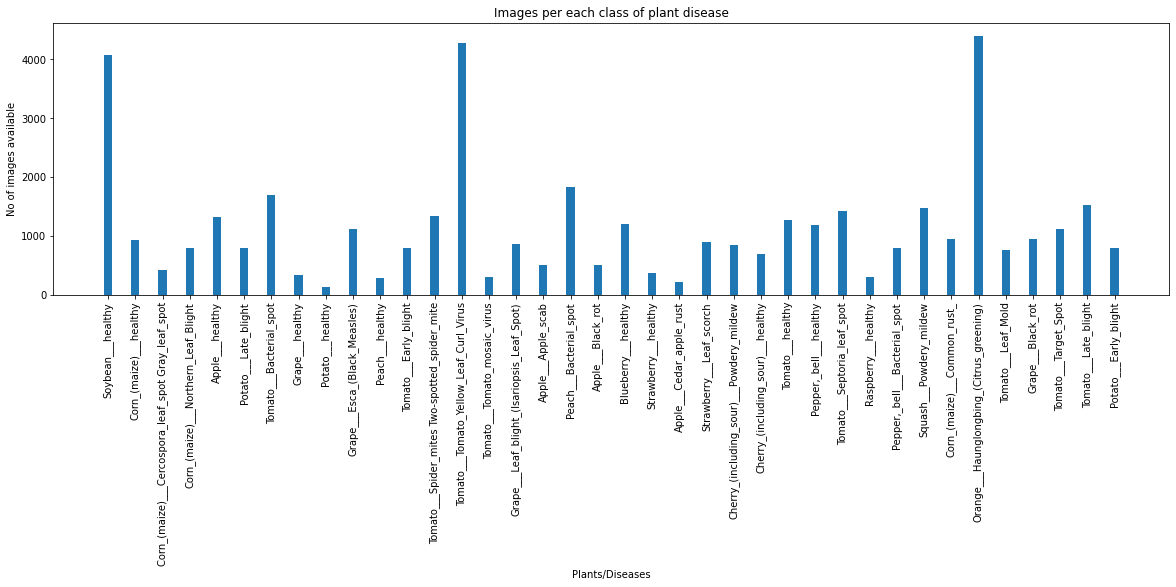

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=10, rotation=90)
plt.title('Images per each class of plant disease')

# **Image Preprocessing**

In [ ]:
# Generating Image Data With Preprocessing Image (Training Datagenration)
training_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
# Generating Image Data With Preprocessing Image (Validation Datagenration)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Dividing Image Datagen In Training And Validation Dataset
train = training_datagen.flow_from_directory(directory="/content/PlantVillage/train",target_size=(256,256),batch_size=32)

val = training_datagen.flow_from_directory(directory="/content/PlantVillage/val",target_size=(256,256),batch_size=32)


Found 44016 images belonging to 39 classes.
Found 11004 images belonging to 39 classes.


In [ ]:
t_img, label = train.next() # Adding First Batch(32) Sample In t_img with label 

In [ ]:
def plotImage(img_arr,label): # Function For Visulizing Image
  for im , l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


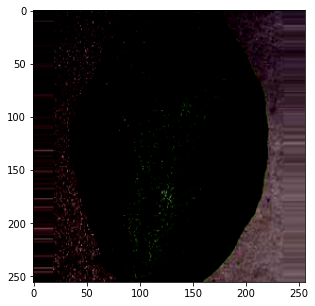

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


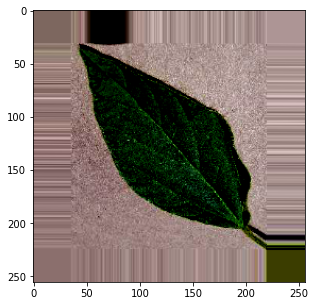

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


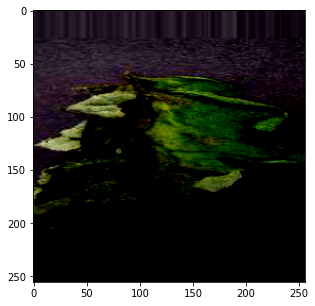

In [ ]:
plotImage(t_img[:3], label[:3]) # Ploting First 3 Preprocessed Images

# **Model Creation**

In [ ]:
from keras.layers import Dense, Flatten # Importing Dense And Flatten Layer From Keras
from keras.models import Model  # Importing Functional API

In [ ]:
# Creating Base Model With ResNet50V2

base_model = ResNet50V2(input_shape=(256,256,3),include_top=False,classes = len(train.classes))


2022-07-09 16:40:41.256786: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


94683136/94668760 [==============================] - 0s 0us/step


In [ ]:
# Setting 'Trainable = False' For Each Layer Of ResNet50V2, Because We Are Doing Transfer Learning
for layer in base_model.layers:  
  layer.trainable = False

In [ ]:
# Visulizing All Layers Of Neural Network(ResNet50V2) -  Before Adding
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
# Adding Flatten Layer
X = Flatten()(base_model.output)
# Adding Dense Layer With Softmax
X = Dense(units=38,activation='softmax')(X)

# Concatinating With ResNet50V2
model = Model(base_model.input,X)
# Visulizing All Layers Of Neural Network(ResNet50V2) -  After Adding
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# Compiling Our Model
model.compile(optimizer= 'adam', 
              loss= keras.losses.categorical_crossentropy, 
              metrics= ['accuracy'])

In [ ]:
# Creating Instance For Callbacks -
    # ModelChekpoint - To Get Best Model
    # EarlyStoping - To Stop Early When Accuracy Is Not Changing
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1)

mc = ModelCheckpoint(filepath="/content/drive/MyDrive/Datasets/Rishabhs_Model", #------------------> This Line Save Our Model On Each Model Check Point Till Max Accuracy In Content Folder 
                     monitor= 'val_accuracy',
                     min_delta= 0.01,
                     patience= 5, 
                     verbose= 1, 
                     save_best_only= True)

cb = [es , mc] # callbacks

# **Model Training**

In [ ]:
# Training Our Model

his = model.fit_generator(train, 
                          steps_per_epoch= 32, 
                          epochs= 50, 
                          verbose= 1, 
                          callbacks= cb, 
                          validation_data= val, 
                          validation_steps= 32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == "__main__":


Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 15.5918 - accuracy: 0.4805
Epoch 1: val_accuracy improved from -inf to 0.61523, saving model to /content/drive/MyDrive/Datasets/Rishabhs_Model


2022-07-09 16:42:56.227313: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-07-09 16:43:05.256 Assets written to: /content/drive/MyDrive/Datasets/Rishabhs_Model/assets


32/32 [==============================] - 62s 2s/step - loss: 15.5918 - accuracy: 0.4805 - val_loss: 9.8034 - val_accuracy: 0.6152
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 6.8600 - accuracy: 0.6670
Epoch 2: val_accuracy improved from 0.61523 to 0.69336, saving model to /content/drive/MyDrive/Datasets/Rishabhs_Model


2022-07-09 16:44:16.687 Assets written to: /content/drive/MyDrive/Datasets/Rishabhs_Model/assets


32/32 [==============================] - 49s 2s/step - loss: 6.8600 - accuracy: 0.6670 - val_loss: 7.0757 - val_accuracy: 0.6934
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 6.1213 - accuracy: 0.7373
Epoch 3: val_accuracy improved from 0.69336 to 0.79297, saving model to /content/drive/MyDrive/Datasets/Rishabhs_Model


2022-07-09 16:45:37.596 Assets written to: /content/drive/MyDrive/Datasets/Rishabhs_Model/assets


32/32 [==============================] - 48s 2s/step - loss: 6.1213 - accuracy: 0.7373 - val_loss: 4.8306 - val_accuracy: 0.7930
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 5.3083 - accuracy: 0.7451
Epoch 4: val_accuracy did not improve from 0.79297
32/32 [==============================] - 33s 1s/step - loss: 5.3083 - accuracy: 0.7451 - val_loss: 4.9532 - val_accuracy: 0.7871
Epoch 5/50
32/32 [==============================] - ETA: 0s - loss: 5.3771 - accuracy: 0.7852
Epoch 5: val_accuracy did not improve from 0.79297
32/32 [==============================] - 32s 1s/step - loss: 5.3771 - accuracy: 0.7852 - val_loss: 5.9806 - val_accuracy: 0.7861
Epoch 6/50
32/32 [==============================] - ETA: 0s - loss: 5.2077 - accuracy: 0.7822
Epoch 6: val_accuracy improved from 0.79297 to 0.82324, saving model to /content/drive/MyDrive/Datasets/Rishabhs_Model


2022-07-09 16:47:38.422 Assets written to: /content/drive/MyDrive/Datasets/Rishabhs_Model/assets


32/32 [==============================] - 48s 2s/step - loss: 5.2077 - accuracy: 0.7822 - val_loss: 5.1915 - val_accuracy: 0.8232
Epoch 7/50
32/32 [==============================] - ETA: 0s - loss: 5.3783 - accuracy: 0.8096
Epoch 7: val_accuracy did not improve from 0.82324
32/32 [==============================] - 32s 1s/step - loss: 5.3783 - accuracy: 0.8096 - val_loss: 4.4874 - val_accuracy: 0.8135
Epoch 8/50
32/32 [==============================] - ETA: 0s - loss: 6.1896 - accuracy: 0.7920
Epoch 8: val_accuracy did not improve from 0.82324
32/32 [==============================] - 31s 991ms/step - loss: 6.1896 - accuracy: 0.7920 - val_loss: 5.4369 - val_accuracy: 0.7939
Epoch 9/50
32/32 [==============================] - ETA: 0s - loss: 5.3801 - accuracy: 0.8125
Epoch 9: val_accuracy did not improve from 0.82324
32/32 [==============================] - 32s 997ms/step - loss: 5.3801 - accuracy: 0.8125 - val_loss: 7.3638 - val_accuracy: 0.8008
Epoch 10/50
32/32 [========================

# **Model Evaluation**

In [ ]:
# Checking Training History
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

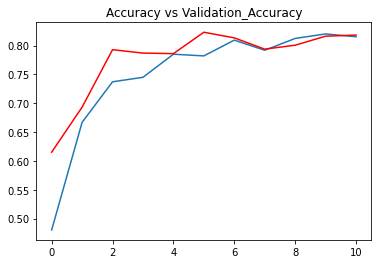

In [ ]:
# Ploting Between 'Training Accuracy' And 'Validation Accuracy' 

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("Accuracy vs Validation_Accuracy")
plt.show()

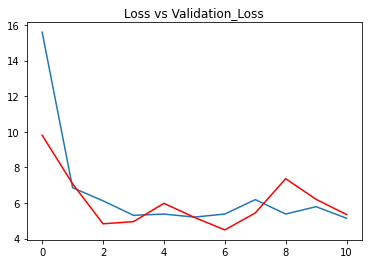

In [ ]:
# Ploting Between 'Training Loss' And 'Validation Loss' 

plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("Loss vs Validation_Loss")
plt.show()

# **Predicting New Image With Saved Model**

Loading Saved Model

In [ ]:
# Loading Our Model From Content Folder To Test On Unknown Data And Evaluate Accuracy

from keras.models import load_model

model = load_model("/content/drive/MyDrive/Datasets/Rishabhs_Model")

In [ ]:
# Creating Refrence To Printing The Predicted Output
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))
ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

Prediction Function

In [ ]:
# Creating Prediction Funtion
def prediction(path):

  # Loading Test Image
  img = load_img(path, target_size= (256, 256))

  plt.imshow(img)

  # Converting To Array For Preprocessing
  i = img_to_array(img)

  # Preprocessing Image
  im = preprocess_input(i)

  # Changing Dimention Of Image To Fit With Model
  img = np.expand_dims(im, axis= 0)

  # Preding Disease
  pred = np.argmax(model.predict(img))
  
  # Printing Name Of Image With Accuracy
  print(f"The Image Belongs To : {ref[pred]}\n")

  # Showing An Test Image
  plt.show()


Results

In [ ]:
acc = model.evaluate_generator(val)[1]

print(f"Accuracy Is : {acc*100}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy Is : 81.30927085876465


In [ ]:
path = "/content/drive/MyDrive/Datasets/Data/test/"

ls = os.listdir(path)


------------------------
Orignal Disease : PotatoEarlyBlight2.JPG

The Image Belongs To : Potato___Early_blight



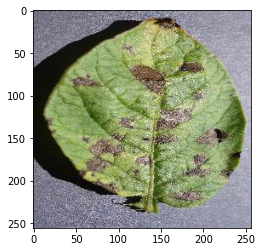


------------------------
Orignal Disease : PotatoEarlyBlight3.JPG

The Image Belongs To : Potato___Late_blight



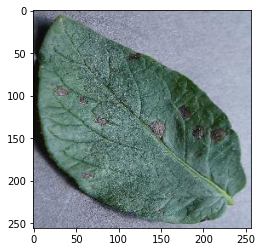


------------------------
Orignal Disease : TomatoYellowCurlVirus2.JPG

The Image Belongs To : Tomato___Tomato_Yellow_Leaf_Curl_Virus



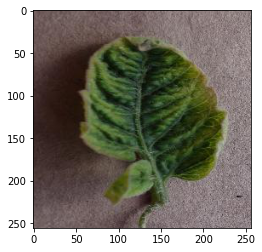


------------------------
Orignal Disease : CornCommonRust3.JPG

The Image Belongs To : Corn_(maize)___Common_rust_



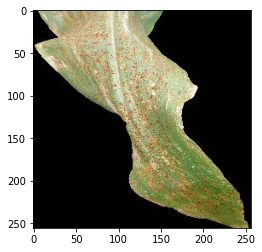


------------------------
Orignal Disease : PotatoHealthy1.JPG

The Image Belongs To : Blueberry___healthy



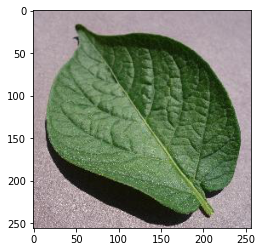


------------------------
Orignal Disease : TomatoEarlyBlight4.JPG

The Image Belongs To : Tomato___Early_blight



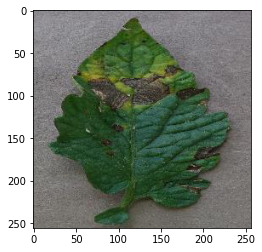


------------------------
Orignal Disease : PotatoEarlyBlight5.JPG

The Image Belongs To : Potato___Early_blight



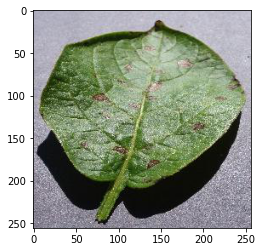


------------------------
Orignal Disease : TomatoEarlyBlight2.JPG

The Image Belongs To : Tomato___Early_blight



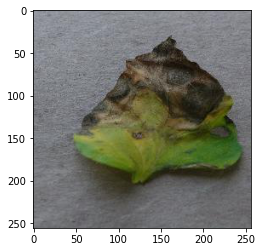


------------------------
Orignal Disease : TomatoYellowCurlVirus1.JPG

The Image Belongs To : Tomato___Tomato_Yellow_Leaf_Curl_Virus



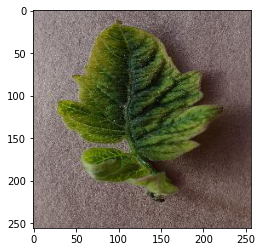


------------------------
Orignal Disease : PotatoEarlyBlight1.JPG

The Image Belongs To : Potato___Early_blight



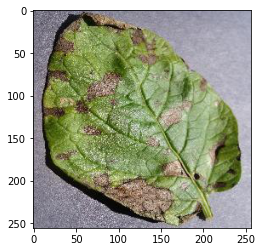


------------------------
Orignal Disease : AppleScab1.JPG

The Image Belongs To : Apple___Apple_scab



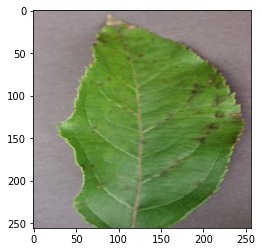


------------------------
Orignal Disease : TomatoYellowCurlVirus3.JPG

The Image Belongs To : Tomato___Tomato_Yellow_Leaf_Curl_Virus



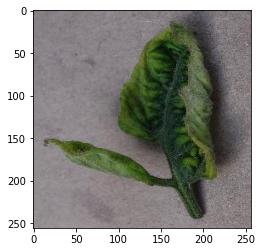


------------------------
Orignal Disease : TomatoEarlyBlight5.JPG

The Image Belongs To : Tomato___Late_blight



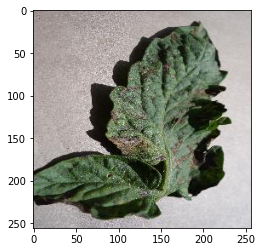


------------------------
Orignal Disease : TomatoYellowCurlVirus4.JPG

The Image Belongs To : Tomato___Tomato_Yellow_Leaf_Curl_Virus



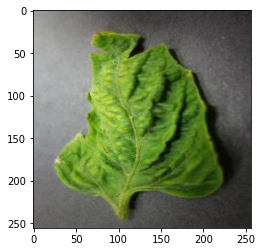


------------------------
Orignal Disease : TomatoEarlyBlight1.JPG

The Image Belongs To : Tomato___Septoria_leaf_spot



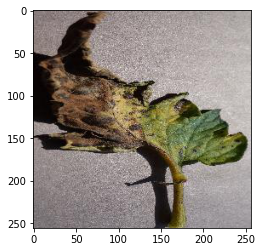


------------------------
Orignal Disease : TomatoYellowCurlVirus5.JPG

The Image Belongs To : Tomato___Tomato_Yellow_Leaf_Curl_Virus



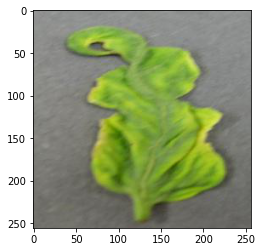


------------------------
Orignal Disease : TomatoEarlyBlight3.JPG

The Image Belongs To : Tomato___Spider_mites Two-spotted_spider_mite



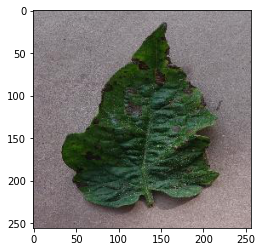


------------------------
Orignal Disease : AppleScab2.JPG

The Image Belongs To : Apple___Apple_scab



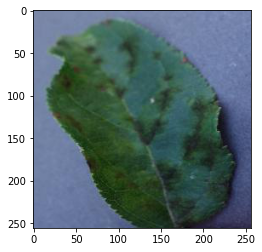


------------------------
Orignal Disease : TomatoYellowCurlVirus6.JPG

The Image Belongs To : Tomato___Tomato_Yellow_Leaf_Curl_Virus



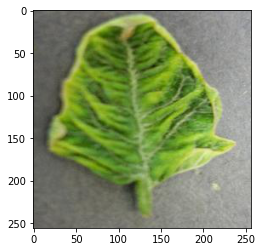


------------------------
Orignal Disease : AppleCedarRust4.JPG

The Image Belongs To : Apple___Cedar_apple_rust



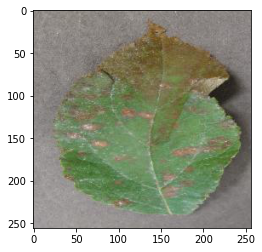


------------------------
Orignal Disease : PotatoEarlyBlight4.JPG

The Image Belongs To : Potato___Early_blight



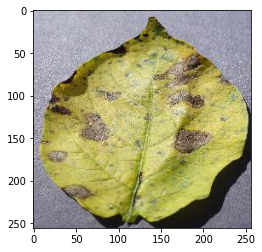


------------------------
Orignal Disease : TomatoEarlyBlight6.JPG

The Image Belongs To : Tomato___Late_blight



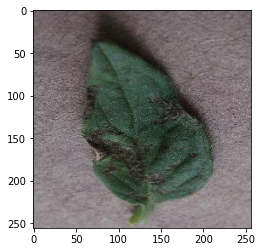


------------------------
Orignal Disease : PotatoHealthy2.JPG

The Image Belongs To : Blueberry___healthy



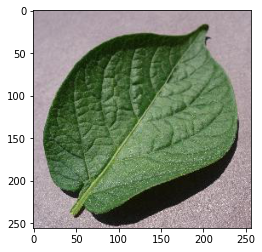


------------------------
Orignal Disease : AppleScab3.JPG

The Image Belongs To : Squash___Powdery_mildew



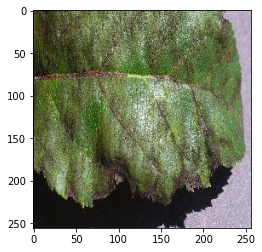


------------------------
Orignal Disease : AppleCedarRust1.JPG

The Image Belongs To : Apple___Cedar_apple_rust



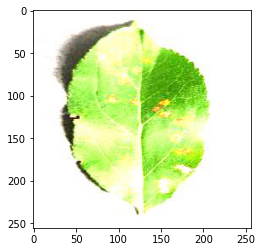


------------------------
Orignal Disease : AppleCedarRust3.JPG

The Image Belongs To : Peach___Bacterial_spot



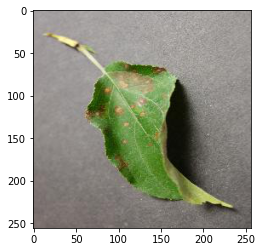


------------------------
Orignal Disease : AppleCedarRust2.JPG

The Image Belongs To : Tomato___Tomato_Yellow_Leaf_Curl_Virus



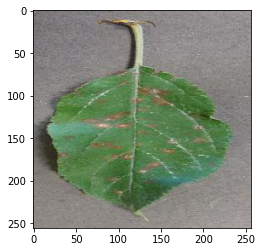


------------------------
Orignal Disease : TomatoHealthy2.JPG

The Image Belongs To : Tomato___Late_blight



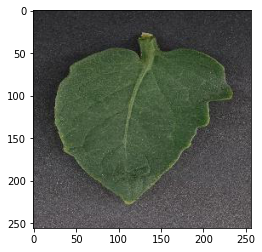


------------------------
Orignal Disease : TomatoHealthy1.JPG

The Image Belongs To : Tomato___Late_blight



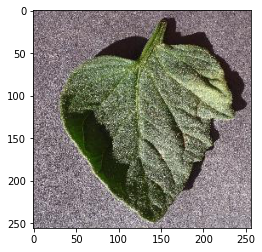


------------------------
Orignal Disease : TomatoHealthy3.JPG

The Image Belongs To : Tomato___Spider_mites Two-spotted_spider_mite



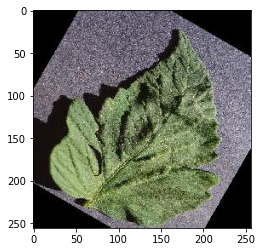


------------------------
Orignal Disease : TomatoHealthy4.JPG

The Image Belongs To : Tomato___Spider_mites Two-spotted_spider_mite



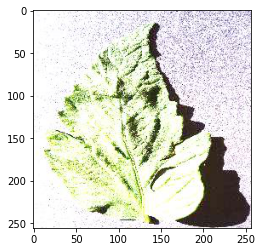


------------------------
Orignal Disease : CornCommonRust2.JPG

The Image Belongs To : Corn_(maize)___Common_rust_



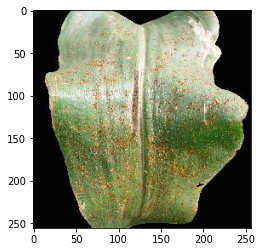


------------------------
Orignal Disease : CornCommonRust1.JPG

The Image Belongs To : Corn_(maize)___Common_rust_



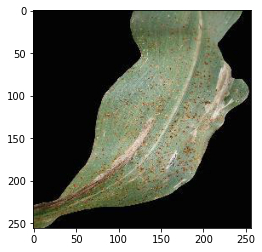

In [ ]:
from matplotlib import image
# Setting Path Of Test Image

# Calling Prediction Function

for k in ls:
  print(f"\n------------------------\nOrignal Disease : {k}\n")
  prediction(path + k)